In [205]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

** Problem 1 **: 7 pts- Using

$$
\cos(x) = \sum_{j=0}^{\infty}\frac{(-1)^{j}}{(2j)!}x^{2j},
$$

derive a Taylor series for $\cos(x^{2})$ around $x=0$.  Write a code which computes the Taylor series of $\cos(x^{2})$ using recursion and a tolerance based while loop approach.(4pts)  On the interval $[0,\pi]$, plot the semi-log error in your approximation for tolerance values $10^{-4}$, $10^{-6}$, and $10^{-8}$. Describe your graphs and comment on any trends you observe.(3pts)

_Answers to Problem 1_


$$
\cos(x) = \sum_{j=0}^{\infty}\frac{(-1)^{j}}{(2j)!}x^{2j}, \\
\cos(x^2) = \sum_{j=0}^{\infty}\frac{(-1)^{j}}{(2j)!}x^{4j}\\
$$

Now, let $a_j$ be an arbitrary element in the sum
$$
a_j = \frac{(-1)^{j}}{(2j)!}x^{4j}\\
a_(j-1) = \frac{(-1)^{(j-1)}}{(2(j-1))!}x^{4(j-1)} = \\
\frac{(-1)^{(j)} (-1)^{-1}}{(2j-2)!}x^{4j-4)} \\
$$

This implies that 
$$
\frac{a_j}{a_(j-1)} = \frac{\frac{(-1)^{j}}{(2j)!}x^{4j}}{\frac{(-1)^{(j)} (-1)^{-1}}{(2j-2)!}x^{4j-4)}} =\\
\frac{-(x^4)}{(2j)(2j-1)}
$$

In [206]:
def cosxsqr_func(xval,tol):
    tot = 1. # for the total you wish to return 
    aj = 1. # the terms you need to update
    j = 1 # your counter
    x4 = -(xval**4.)
    while np.max(np.abs(aj))>=tol:
        aj *= (x4)/((2*j)*(2*j-1))
        tot += aj
        j += 1 
    return tot 

In [207]:
xvals = np.linspace(0.,np.pi,int(1e3))
yvalst = np.cos(xvals**2)
yvals1 = [cosxsqr_func(xval,1e-4) for xval in xvals]
yvals2 = [cosxsqr_func(xval,1e-6) for xval in xvals]
yvals3 = [cosxsqr_func(xval,1e-8) for xval in xvals]

Text(0, 0.5, '$log_{10}Error$')

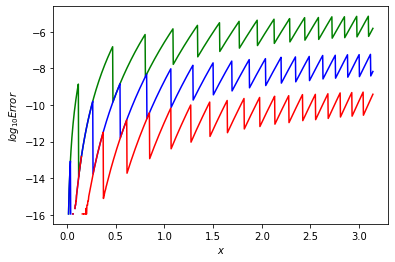

In [208]:
e4 = np.log10(np.abs(yvalst - yvals1))
e6 = np.log10(np.abs(yvalst - yvals2))
e8 = np.log10(np.abs(yvalst - yvals3))


plt.plot(xvals, e4, label='10**(-4)', color = 'g')
plt.plot(xvals, e6, label='10**(-6)', color = 'b')
plt.plot(xvals, e8, label='10**(-8)', color = 'r')

plt.xlabel('$x$')
plt.ylabel('$log_{10}Error$')

From the graph above, we can examine the three attempts to approximate  $\cos(x^{2})$ in the interval $[0,\pi]$ by using the Taylor Series around $x=0$. The difference between the three graphs is the tolerence value. The red graph has a tolerance of ${10}^{-8}$, the blue graph is a tolerance of ${10}^{-6}$, and lastly the green graph has a tolerance of ${10}^{-4}$. As the tolerance gets smaller the more accurate the resulted graph is. Therefore, the red graph is the most accurate approximation to $\cos(x^{2})$. It is also visual that as x gets bigger the error gets bigger. This is due to error accumilation and because we used the Taylor series around x=0 to approximate our graph. Hence, as we get farther away from x=0 the error increases. 

** Problem 2 **: 7 pts- An important function in physics is the Airy function given by the Taylor Series

$$
y_{1}(x) = 1 + \sum_{m=1}^{\infty}c_{m}x^{3m}, ~ c_{m} = \prod_{l=1}^{m} \frac{1}{(3l-1)(3l)}.
$$

Note the coefficients $c_{m}$ follow the pattern

\begin{align}
c_{1} = & \prod_{l=1}^{1} \frac{1}{(3l-1)(3l)} = \frac{1}{2\cdot 3}\\
c_{2} = & \prod_{l=1}^{2} \frac{1}{(3l-1)(3l)} = \frac{1}{2\cdot 3 \cdot 5 \cdot 6}
\end{align}

Using recursion and a tolerance based while loop approach, write a code which makes two separate plots, one for $-L_{x}\leq x \leq 0$ and one for $0\leq x \leq L_{x}$, where $L_{x}$ is a user specified value (4pts).  Provide plots for $L_{x}=5,15$ and for tolerances $10^{-8}$ and $10^{-10}$. and describe the phenomena you see in the eight different plots. (3pts)

_Answers to Problem 2_

understanding the sequence:
Let, 
$ a_m=c_m {x}^{3m}$
Now, 
$$
a_m = \begin{cases}
\frac{x^3}{(3m-1)(3m)}a_{m-1}, & m>0 \\
1, & m=0
\end{cases}
$$
and our first term is am = 1. From there we create a recursion call which will multiply $a_m$ by $\frac{x^3}{(3m-1)(3m)}a_{m-1}$. 

In [209]:
def y1_func(x, tol):
    tot = 1
    x3 = x**3
    am = 1
    m = 1
    while np.max(np.abs(am)) >= tol:
        am *= x3/((3*m-1)*(3*m))
        tot += am
        m += 1
    return tot + 1

Text(0.5, 1.0, 'Tolerance Value is 1.00e-10')

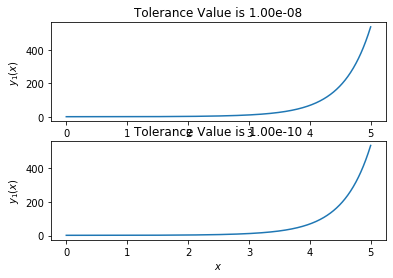

In [210]:
# In order to get different graphs to appear at the same time you will need to use subplot.  This gets used like

xpos05 = np.linspace(0.,5.,int(1e3))
ypos051 = y1_func(xpos05, 1e-8)# use the function you define for tol=1e-8
ypos052 = y1_func(xpos05, 1e-10)# use the function you define for tol=1e-10 

plt.subplot(2,1,1)
plt.plot(xpos05,ypos051)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-8)

plt.subplot(2,1,2)
plt.plot(xpos05,ypos052)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-10)


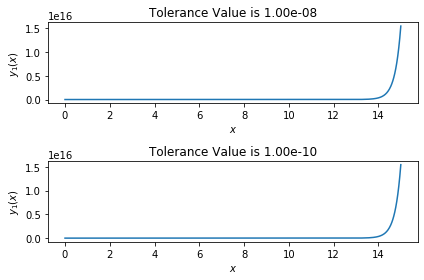

In [211]:
xpos15 = np.linspace(0.,15.,int(1e3))
ypos151 = y1_func(xpos15, 1e-8)# use the function you define for tol=1e-8
ypos152 = y1_func(xpos15, 1e-10)# use the function you define for tol=1e-10

plt.subplot(2,1,1)
plt.plot(xpos15,ypos151)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-8)

plt.subplot(2,1,2)
plt.plot(xpos15,ypos152)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-10)

plt.tight_layout()

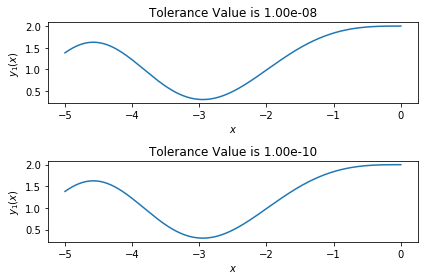

In [212]:
xneg05 = np.linspace(-5.,0.,int(1e3))
yneg051 = y1_func(xneg05, 1e-8)# use the function you define for tol=1e-8
yneg052 = y1_func(xneg05, 1e-8)# use the function you define for tol=1e-10 

plt.subplot(2,1,1)
plt.plot(xneg05,yneg051)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-8)

plt.subplot(2,1,2)
plt.plot(xneg05,yneg052)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-10)

plt.tight_layout()

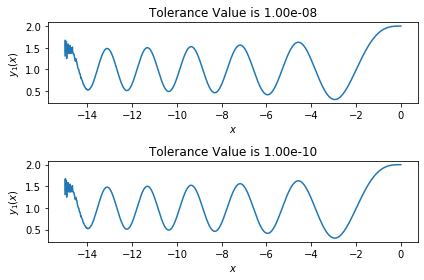

In [213]:
xneg15 = np.linspace(-15.,0.,int(1e3))
yneg151 = y1_func(xneg15, 1e-8)# use the function you define for tol=1e-8
yneg152 = y1_func(xneg15, 1e-10)# use the function you define for tol=1e-10 

plt.subplot(2,1,1)
plt.plot(xneg15,yneg151)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-8)

plt.subplot(2,1,2)
plt.plot(xneg15,yneg152)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-10)

plt.tight_layout()

_Provide Summary of Results for Problem 2 Here_

In the eight graphs above we can see y1(x) in 4 different intervals $[0,5], [-5,0], [0,15], [-15,0]$ in each interval I ploted a graph with a tolerance equal to ${10}^{-8}$ and ${10}^{-10}$. 

In the interval of $[0,5]$ we examine that as x gets bigger the function y1(x) increases. This is similar to what is present in the interval $[0,15]$. Yet the difference is that the rangle of y1(x) in the interval of $[0,5]$ is approximately $[0,400]$ whereas in the interval $[0,15]$ the range is approximately $[0,1.5e16]$ this is significantly a greater range. Hence, y1(x) increases drastically as x gets bigger. The graph y1(x) diverges as x approaches infinity.  

In comparison, the negative intervals behave differently, such that in the interval $[-5,0]$ y1(x) decrease and then increases and then seems to decrease again. When looking at the interval $[-15,0]$ this starts to make more sense since the graph y1(x) is oscillating. Eventually y1(x) will converge to a certain point around 1.5 as x approaches negative infinity. 

** Problem 3 **: 5 pts- If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6, and 9.  The sum of these multiples is 23.  Find the sum of all multiples of 3 or 5 below 100.  Note, you will need to make use of the mod command `%`, which in effect finds remainders from division.  Note the use below. Likewise you will also need to use the logical operation `or`. 

In [214]:
# How to use %
sum = 0
for x in range(1,100):
    if (x%3 ==0) or (x%5 ==0):
        sum+=x
print(sum)

2318


_Answer to Problem 3_  answer: 2318

** Problem 4 **: 5 pts - Using a for loop based approach, write a program which finds 

$$
\frac{1}{n}\sum_{j=1}^{n} \left(\left(\frac{j}{n}\right)^{4} + 3\left(\frac{j}{n}\right)^{2} \right)
$$

for any positive integer n.  Generate a labeled plot of the results of your function for $1\leq n \leq 100$, where $n$ will be on the $x$-axis, while the results of your function will appear on the $y$-axis.  Describe any trends you see from your graph.       

_Answer to Problem 4_

In [215]:
def problem4_fun(n):
    tot =0
    for x in range(1,int(n)+1):
        p2 = ((x/n)**2.)
        ax = (p2*(p2 +3.))
        tot+= ax
    return(tot/n)

Text(0, 0.5, '$f(n)$')

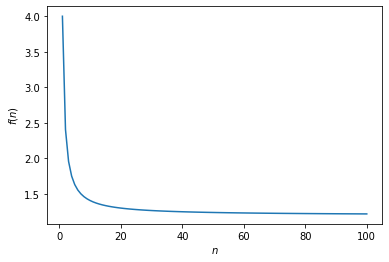

In [217]:
nvals = np.linspace(1.,100.,100)
yvals = [problem4_fun(nval) for nval in nvals] 

plt.plot(nvals, yvals)
plt.xlabel('$n$')
plt.ylabel('$f(n)$')

In the graph above it is visual that f(n) is approaching 1.2 as n approaches infinity. It seems as f(n) has a horizontal asymptote at y=1.2. This is because as n becomes bigger. The ratio of j/n will approach zero. Hence, adding terms when n is big will not effect the sum much. In addition, the sum is multiplied by 1/n. Hence, as n gets bigger, the function will get smaller. The sum will remain slightly above 1.2.